In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
labels = pd.read_csv('covid.predict.txt', sep=" ", header=None)
labels.columns = ["pred"]

In [3]:
covid_dict = np.load("covid.npy", allow_pickle=True).item()

In [4]:
predicted = list(labels["pred"])

In [5]:
#covid.data.txt

# get all tweets id
covid_list = []
with open("covid.data.txt", "r") as covid:

    ids = covid.readline()
    while ids:
        temp = []
        ids = ids.replace("\n", "")
        ids = ids.split(",")
        for id in ids:
            temp.append(id)
        covid_list.append(temp)
        ids = covid.readline()
print(len(covid_list))

17458


In [6]:
def get_texts(ids, covid_list, covid_dict, predicted):
    index = covid_list.index(ids)
    pred = predicted[index]
    texts = []
    for id in ids:
        texts.append(covid_dict[id])
    return texts, pred

In [66]:
import nltk
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

tt = TweetTokenizer()
stopwords = set(
    stopwords.words('english'))  #note: stopwords are all in lowercase


def preprocess_data(tweet, x_dict):
    reg = '.+["a-zA-Z"].+'
    x_processed = []
    tokens = tt.tokenize(tweet)
    for t in tokens:
        word = re.findall(reg, t)
        if word != []:
            word = word[0].lower()
            if word not in stopwords:
                x_dict[word] = x_dict.get(word, 0) + 1

In [9]:
#only thg first text
word_count_rumours = {}
word_count_nonrumours = {}
rumours_list = []
nonrumours_list = []

for ids in covid_list:
    index = covid_list.index(ids)
    pred = predicted[index]
    id = ids[0]
    tweet = covid_dict[id]
    if tweet != 'Authorization Error' and tweet != 'Not Found Error':
        string = tweet["text"]
        if pred == 'rumour':
            preprocess_data(tweet=string, x_dict=word_count_rumours)
            rumours_list.append(string)

        else:
            preprocess_data(tweet=string, x_dict=word_count_nonrumours)
            nonrumours_list.append(string)

In [27]:
len(rumours_list)

3468

In [10]:
#merge replies for each line, for q4

rumours_replies = []
nonrumours_replies = []

for ids in covid_list:
    index = covid_list.index(ids)
    pred = predicted[index]
    if len(ids) > 1:
        temp = []
        for id in ids[1:]:
            tweet = covid_dict[id]
            if tweet != 'Authorization Error' and tweet != 'Not Found Error':
                string = tweet["text"]
                temp.append(string)
        if pred == 'rumour':
            rumours_replies.append(temp)
        else:
            nonrumours_replies.append(temp)

In [12]:
sorted_rumours_dict = dict(
    sorted(word_count_rumours.items(), key=lambda item: item[1]))
rumours_word_list = list(sorted_rumours_dict.keys())
rumours_word_list.reverse()
#rumours_word_list

['coronavirus',
 'trump',
 'covid',
 'president',
 'people',
 'says',
 'pandemic',
 'new',
 'americans',
 '#covid19',
 'would',
 'news',
 'one',
 'china',
 '@realdonaldtrump',
 'said',
 'like',
 'get',
 'house',
 '#coronavirus',
 'white',
 'response',
 'crisis',
 'media',
 'million',
 "trump's",
 'donald',
 'america',
 'cases',
 'going',
 'time',
 'breaking',
 'back',
 'democrats',
 'health',
 'american',
 'deaths',
 'country',
 'say',
 'rally',
 'even',
 'think',
 'economy',
 'virus',
 'could',
 'world',
 'today',
 'bill',
 'flu',
 'biden',
 'government',
 'know',
 'campaign',
 'want',
 'states',
 'day',
 'lives',
 'many',
 'administration',
 'spread',
 'right',
 'stop',
 'first',
 'every',
 'last',
 'public',
 'death',
 'masks',
 'press',
 'never',
 'need',
 'workers',
 'help',
 'take',
 'gop',
 'let',
 'chinese',
 'see',
 'testing',
 'still',
 'state',
 'republicans',
 'must',
 'die',
 'obama',
 'told',
 'work',
 'joe',
 'national',
 'claims',
 'two',
 'care',
 'relief',
 'times',
 

In [13]:
sorted_nonrumours_dict = dict(
    sorted(word_count_nonrumours.items(), key=lambda item: item[1]))
nonrumours_word_list = list(sorted_nonrumours_dict.keys())
nonrumours_word_list.reverse()
#nonrumours_word_list

['coronavirus',
 'covid',
 '#covid19',
 'cases',
 'new',
 'people',
 'pandemic',
 '#coronavirus',
 'deaths',
 'health',
 'trump',
 'positive',
 'says',
 'one',
 'today',
 'tested',
 'virus',
 'president',
 'state',
 'day',
 'testing',
 'may',
 'government',
 'get',
 'breaking',
 'said',
 'spread',
 'days',
 'time',
 'country',
 'world',
 'public',
 'states',
 'need',
 'died',
 'help',
 'test',
 'patients',
 'could',
 'first',
 'lockdown',
 'number',
 'home',
 'tests',
 'death',
 'crisis',
 'china',
 'would',
 'million',
 'response',
 'many',
 'like',
 'hospital',
 'care',
 'due',
 'reported',
 'total',
 'outbreak',
 'confirmed',
 'back',
 'weeks',
 'work',
 'house',
 'news',
 'week',
 'workers',
 'social',
 'say',
 'two',
 'mask',
 'last',
 'data',
 'know',
 'americans',
 'going',
 'masks',
 'even',
 'take',
 'please',
 'still',
 'lives',
 'since',
 'vaccine',
 'must',
 'fight',
 'florida',
 'medical',
 'make',
 'stay',
 'support',
 'white',
 'every',
 'via',
 'also',
 'see',
 'gov',
 

In [14]:
#count  all hashtages in each
nonru_hashtag_all = {}
ru_hashtag_all = {}

reg = r'\B#\w*[a-zA-Z]+\w*'

for word, count in word_count_rumours.items():
    temp = re.findall(reg, word)
    if temp != []:
        temp = temp[0]
        ru_hashtag_all[temp] = count

for word, count in word_count_nonrumours.items():
    temp = re.findall(reg, word)
    if temp != []:
        temp = temp[0]
        nonru_hashtag_all[temp] = count

In [15]:
#count hashtages in each remove all Common words in the covid topic.
rumours_hashtage_dict = {}
nonrumours_hashtage_dict = {}
rumours_hashtage_set = set()
nonrumours_hashtage_set = set()

reg = r'\B#\w*[a-zA-Z]+\w*'
normal = [
    '#covid19', '#coronavirus', '#covidー19', '#covid_19', '#covid',
    '#covid19ph', '#covid2019', '#covid__19', '#coronavirususa',
    '#covid19pandemic', '#coronaviruspandemic', '#coronaviruspandemic'
]
for word, count in word_count_rumours.items():
    temp = re.findall(reg, word)
    if temp != []:
        temp = temp[0]
        if temp not in normal:
            rumours_hashtage_dict[temp] = count
            rumours_hashtage_set.add(temp)

for word, count in word_count_nonrumours.items():
    temp = re.findall(reg, word)
    if temp != []:
        temp = temp[0]
        if temp not in normal:
            nonrumours_hashtage_dict[temp] = count
            nonrumours_hashtage_set.add(temp)

## Q1 topics

In [59]:
import gensim

In [72]:
# cite from https://blog.csdn.net/weixin_42608414/article/details/87559437
import numpy as np
import pandas as pd
import gensim
from gensim import corpora, models
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from pprint import pprint

In [156]:
# cite from https://blog.csdn.net/weixin_42608414/article/details/87559437

stemmer = SnowballStemmer('english')
 
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
 
#remove the word length <3
remove = ["https","http","covid","coronavirus","covid_19"]
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stopwords and len(token) > 3 and token not in remove:
            result.append(lemmatize_stemming(token))
    return result



In [157]:
#create dict for each
# cite from https://blog.csdn.net/weixin_42608414/article/details/87559437
rumours_df = pd.DataFrame(rumours_list,columns =['tweet'])
nonrumours_df = pd.DataFrame(nonrumours_list,columns =['tweet'])

rumours_df['index'] = rumours_df.index
nonrumours_df['index'] = nonrumours_df.index

#data preprocess
processed_ru_df = rumours_df['tweet'].map(preprocess)
processed_nonru_df = nonrumours_df['tweet'].map(preprocess)

q1_ru_dict = gensim.corpora.Dictionary(processed_ru_df)
q1_nonru_dict = gensim.corpora.Dictionary(processed_nonru_df)

q1_ru_dict.filter_extremes(no_below=15, no_above=0.5)
q1_nonru_dict.filter_extremes(no_below=15, no_above=0.5)


bow_corpus_ru = [q1_ru_dict.doc2bow(i) for i in processed_ru_df]
bow_corpus_nonru = [q1_nonru_dict.doc2bow(i) for i in processed_nonru_df]


In [158]:
#train LDA model on both 
# cite from https://blog.csdn.net/weixin_42608414/article/details/87559437
ru_lda_model = gensim.models.LdaMulticore(bow_corpus_ru, num_topics=10, id2word=q1_ru_dict, passes=2, workers=2)
nonru_lda_model = gensim.models.LdaMulticore(bow_corpus_nonru, num_topics=10, id2word=q1_nonru_dict, passes=2, workers=2)

In [160]:
for idx, topic in ru_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.020*"say" + 0.020*"presid" + 0.016*"trump" + 0.015*"peopl" + 0.012*"give" + 0.012*"call" + 0.012*"time" + 0.012*"million" + 0.011*"blame" + 0.011*"month"
Topic: 1 
Words: 0.060*"trump" + 0.018*"say" + 0.014*"american" + 0.013*"pandem" + 0.011*"order" + 0.010*"presid" + 0.009*"support" + 0.009*"ralli" + 0.008*"peopl" + 0.008*"time"
Topic: 2 
Words: 0.019*"trump" + 0.017*"forc" + 0.015*"presid" + 0.014*"live" + 0.014*"say" + 0.012*"task" + 0.012*"death" + 0.011*"news" + 0.011*"america" + 0.011*"break"
Topic: 3 
Words: 0.043*"trump" + 0.026*"say" + 0.021*"peopl" + 0.016*"presid" + 0.015*"want" + 0.014*"test" + 0.012*"china" + 0.011*"american" + 0.011*"realdonaldtrump" + 0.011*"pandem"
Topic: 4 
Words: 0.028*"trump" + 0.021*"claim" + 0.016*"would" + 0.013*"pandem" + 0.012*"like" + 0.012*"presid" + 0.010*"relief" + 0.010*"live" + 0.009*"hous" + 0.009*"right"
Topic: 5 
Words: 0.059*"trump" + 0.032*"presid" + 0.016*"say" + 0.012*"hous" + 0.012*"peopl" + 0.011*"democrat" + 0

In [161]:
for idx, topic in nonru_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.031*"test" + 0.013*"posit" + 0.011*"hospit" + 0.011*"doctor" + 0.010*"peopl" + 0.010*"patient" + 0.009*"time" + 0.009*"trump" + 0.008*"say" + 0.007*"medic"
Topic: 1 
Words: 0.029*"test" + 0.018*"case" + 0.018*"home" + 0.012*"say" + 0.011*"posit" + 0.011*"countri" + 0.010*"confirm" + 0.008*"spread" + 0.008*"state" + 0.008*"peopl"
Topic: 2 
Words: 0.014*"vaccin" + 0.011*"make" + 0.010*"pandem" + 0.010*"work" + 0.010*"come" + 0.008*"million" + 0.007*"fight" + 0.007*"say" + 0.007*"time" + 0.007*"nation"
Topic: 3 
Words: 0.019*"peopl" + 0.016*"say" + 0.013*"american" + 0.011*"studi" + 0.011*"could" + 0.010*"live" + 0.010*"test" + 0.009*"trump" + 0.009*"find" + 0.008*"week"
Topic: 4 
Words: 0.032*"death" + 0.030*"case" + 0.026*"mask" + 0.026*"peopl" + 0.021*"wear" + 0.015*"report" + 0.014*"total" + 0.013*"number" + 0.011*"state" + 0.009*"break"
Topic: 5 
Words: 0.015*"govern" + 0.014*"work" + 0.011*"state" + 0.009*"lockdown" + 0.008*"take" + 0.008*"tell" + 0.008*"death" + 

## Q3 hashtages analysis

In [16]:
#q3
#get sorted list of hashtages for each
sorted_rumours_hashtage_dict = dict(
    sorted(rumours_hashtage_dict.items(), key=lambda item: item[1]))
rumours_hashtage_list = list(sorted_rumours_hashtage_dict.keys())
rumours_hashtage_list.reverse()

sorted_nonrumours_hashtage_dict = dict(
    sorted(nonrumours_hashtage_dict.items(), key=lambda item: item[1]))
nonrumours_hashtage_list = list(sorted_nonrumours_hashtage_dict.keys())
nonrumours_hashtage_list.reverse()

In [45]:
nonrumours_hashtage_list

['#breaking',
 '#stayhome',
 '#cdnpoli',
 '#lockdown',
 '#stayhomesavelives',
 '#socialdistancing',
 '#stayathome',
 '#staysafe',
 '#stayalert',
 '#indiafightscorona',
 '#sarscov2',
 '#txlege',
 '#onpoli',
 '#auspol',
 '#wuhan',
 '#pandemic',
 '#covid19nigeria',
 '#takeresponsibility',
 '#india',
 '#hydroxychloroquine',
 '#watch',
 '#familiesfirst',
 '#ppe',
 '#covidiots',
 '#ridge',
 '#nhs',
 '#coronavirussa',
 '#blacklivesmatter',
 '#maga',
 '#marr',
 '#texas',
 '#wearamask',
 '#coronavirusoutbreak',
 '#staysafeug',
 '#recallkatebrown',
 '#coronavirusinsa',
 '#corona',
 '#cnnsotu',
 '#covid19insa',
 '#flattenthecurve',
 '#coronaupdate',
 '#gmb',
 '#coronavirusuk',
 '#komeshacorona',
 '#trump',
 '#sabcnews',
 '#ccpvirus',
 '#stayhomestaysafe',
 '#newsnight',
 '#coronaviruslockdown',
 '#inthistogetherohio',
 '#togetherathome',
 '#oann',
 '#foxnews',
 '#italy',
 '#lockdownextension',
 '#arizona',
 '#gapol',
 '#crushthecurve',
 '#youractionssavelives',
 '#inthistogether',
 '#covid19india

In [39]:
common_list = set(rumours_hashtage_list)&set(nonrumours_hashtage_list)

In [50]:
diff_list = set(rumours_hashtage_list) or set(nonrumours_hashtage_list)

In [51]:
len(diff_list)

447

In [42]:
len(common_list)

134

In [17]:
from collections import OrderedDict

res_ru = OrderedDict(reversed(list(sorted_rumours_hashtage_dict.items())))
res_nonru = OrderedDict(reversed(list(
    sorted_nonrumours_hashtage_dict.items())))

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

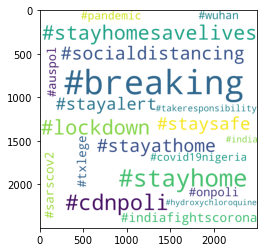

In [53]:
wc_nonru = WordCloud(
    background_color="white",
    width=2500,
    height=2500,
    max_words=20,
    relative_scaling=0.5,
    normalize_plurals=False).generate_from_frequencies(res_nonru)
plt.imshow(wc_nonru)

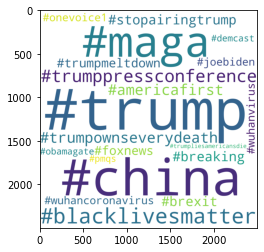

In [49]:
wc_ru = WordCloud(background_color="white",
                  width=2500,
                  height=2500,
                  max_words=20,
                  relative_scaling=0.5,
                  normalize_plurals=False).generate_from_frequencies(res_ru)
plt.imshow(wc_ru)

In [31]:
#count the number of hashtags
num_record_ru = len(rumours_list)
print("total number of rumours:", num_record_ru)
num_record_nonru = len(nonrumours_list)
print("total number of nonrumours:", num_record_nonru)
print("total number of valid records:", num_record_ru + num_record_nonru)
print("percentage of rumours in data:",
      100 * num_record_ru / (num_record_ru + num_record_nonru))

num_diff_nonru_hash = len(nonrumours_hashtage_list)
print("number of different hashtags in nonrumours:", num_diff_nonru_hash)
num_diff_ru_hash = len(rumours_hashtage_list)
print("number of different hashtags in rumours:", num_diff_ru_hash)



total_num_nonru_hash = sum(nonru_hashtag_all.values())
print("number of total hashtags in nonrumours:", total_num_nonru_hash)
total_num_ru_hash = sum(ru_hashtag_all.values())
print("number of total hashtags in rumours:", total_num_ru_hash)
print("number of total hashtags:", total_num_ru_hash + total_num_nonru_hash)
print("hashtags per record for rumours:", total_num_ru_hash / num_record_ru)
print("hashtags per record:for nonrumours",
      total_num_nonru_hash / num_record_nonru)

total number of rumours: 3468
total number of nonrumours: 12490
total number of valid records: 15958
percentage of rumours in data: 21.732046622383756
number of different hashtags in nonrumours: 2098
number of different hashtags in rumours: 447
number of total hashtags in nonrumours: 3648
number of total hashtags in rumours: 897
number of total hashtags: 4545
hashtags per record for rumours: 0.2586505190311419
hashtags per record:for nonrumours 0.2920736589271417


## Q4 sentiment analysis

In [22]:
#q4 sentiment analysis
from textblob import TextBlob
import re

In [56]:
def clean_tweet(tweet):
    return "".join(
        re.sub("(@[A-Za-z0-9]+)|([^0-9A-Aa-z\t])|(\w+:\/\/\S+)", "",
               tweet).split())


def get_sentiment(tweet):
    #print(clean_tweet(tweet))
    #result = TextBlob(clean_tweet(tweet))
    result = TextBlob(tweet)
    return result.sentiment.polarity


def get_avg_sentiment(a_list):
    score = 0
    for tweet in a_list:
        score += get_sentiment(tweet)
    return score / len(a_list)


def get_avg_sentiment_replies(a_list):
    count = 0
    score = 0
    for tweets in a_list:
        for tweet in tweets:
            count += 1
            score += get_sentiment(tweet)
    return score / count

In [24]:
avg_rumours_sentiment_score = get_avg_sentiment(rumours_list)
avg_nonrumours_sentiment_score = get_avg_sentiment(nonrumours_list)
avg_rumours_replies_score = get_avg_sentiment_replies(rumours_replies)
avg_nonrumours_replies_score = get_avg_sentiment_replies(nonrumours_replies)

In [25]:
print("average sentiment for rumours ", avg_rumours_sentiment_score)
print("average sentiment for nonrumours", avg_nonrumours_sentiment_score)
print("average sentiment for replies to rumours", avg_rumours_replies_score)
print("average sentiment for replies to nonrumours",
      avg_nonrumours_replies_score)

average sentiment for rumours  0.02636099140178796
average sentiment for nonrumours 0.07286814925508112
average sentiment for replies to rumours 0.015131251955195997
average sentiment for replies to nonrumours 0.03889166451622712


In [55]:
def get_sentiment_big(tweet):
    #print(clean_tweet(tweet))
    #result = TextBlob(clean_tweet(tweet))
    result = TextBlob(tweet)
    output = result.sentiment.polarity
    if output<0:
        return -1
    elif output == 0:
        return 0
    else:
        return 1

def get_avg_sentiment_big(a_list):
    score = 0
    for tweet in a_list:
        score += get_sentiment_big(tweet)
    return score / len(a_list)


def get_avg_sentiment_replies_big(a_list):
    count = 0
    score = 0
    for tweets in a_list:
        for tweet in tweets:
            count += 1
            score += get_sentiment_big(tweet)
    return score / count

In [57]:
avg_rumours_sentiment_score_big = get_avg_sentiment_big(rumours_list)
avg_nonrumours_sentiment_score_big = get_avg_sentiment_big(nonrumours_list)
avg_rumours_replies_score_big = get_avg_sentiment_replies_big(rumours_replies)
avg_nonrumours_replies_score_big = get_avg_sentiment_replies_big(nonrumours_replies)
print("average sentiment for rumours ", avg_rumours_sentiment_score_big)
print("average sentiment for nonrumours", avg_nonrumours_sentiment_score_big)
print("average sentiment for replies to rumours", avg_rumours_replies_score_big)
print("average sentiment for replies to nonrumours",
      avg_nonrumours_replies_score_big)

average sentiment for rumours  0.11072664359861592
average sentiment for nonrumours 0.2952762209767814
average sentiment for replies to rumours 0.06125132837407014
average sentiment for replies to nonrumours 0.13629283489096572
